## Part 1 - Data Exploration

In [15]:
import pandas as pd

In [16]:
cars = pd.read_csv("cars.csv")

#### 1. Summaries and Aggregates

In [ ]:
#A. The describe() method


In [4]:
cars.describe()           
# 1. doesn't include categorical values
# 2. Don't compare two columns (focus one column at a time)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
cars.MPG.mean()

23.051231527093602

In [5]:
cars["MPG"].mean()

23.051231527093602

In [6]:
cars.mean()

MPG               23.051232
Cylinders          5.475369
Displacement     194.779557
Horsepower       103.529557
Weight          2979.413793
Acceleration      15.519704
Model             75.921182
dtype: float64

In [7]:
cars[["MPG", "Weight", "Origin"]].mean()

MPG         23.051232
Weight    2979.413793
dtype: float64

In [8]:
cars[["MPG", "Weight"]].sum()

MPG          9358.8
Weight    1209642.0
dtype: float64

In [9]:
cars[["MPG", "Weight"]].std()

MPG         8.401777
Weight    847.004328
dtype: float64

In [ ]:
#A. Aggregates - groupby() method


In [10]:
cars[["Weight", "Origin"]].groupby(["Origin"]).mean()

,Weight
Origin,
Europe,2431.493151
Japan,2221.227848
US,3372.700787


In [ ]:
# Conditional mean

In [11]:
cars[["MPG", "Weight", "Origin"]].groupby(["Origin"]).mean()

,MPG,Weight
Origin,,
Europe,26.745205,2431.493151
Japan,30.450633,2221.227848
US,19.688189,3372.700787


In [12]:
cars[["Weight", "MPG", "Acceleration", "Cylinders"]].groupby(["Cylinders"]).median()

,Weight,MPG,Acceleration
Cylinders,,,
3,2375.0,20.25,13.5
4,2234.0,28.00,16.2
5,2950.0,25.40,19.9
6,3201.5,19.00,16.1
8,4137.5,14.00,13.0


#### 2. Tables (Crosstabs)

In [19]:
#A. Univariate Frequency distribution of a categorical variable (say, Origin)
tab = pd.crosstab(cars.Origin, columns="Counts")
tab

col_0,Counts
Origin,
Europe,73
Japan,79
US,254


In [14]:
type(tab)

pandas.core.frame.DataFrame

In [15]:
#B. Univariate table of proportion
tab/len(cars)

col_0,Counts
Origin,
Europe,0.179803
Japan,0.194581
US,0.625616


In [16]:
#B. Univariate table of percentage
round(tab/len(cars)*100, 2)

col_0,Counts
Origin,
Europe,17.98
Japan,19.46
US,62.56


In [21]:
#C. Bi-variate Frequency Distribution Table
table = pd.crosstab(cars.Origin, columns=cars.Cylinders)
table

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
US,0,72,0,74,108


In [ ]:
# probability 

In [ ]:
#Re-Naming the Rows and Columns
table.columns = ["Cy13", "Cy14", "Cy15", "Cy16", "Cy18"]

In [23]:
#Finding the col-sums
coltotal = table.sum(axis = 0)
coltotal

Cylinders
3      4
4    207
5      3
6     84
8    108
dtype: int64

In [22]:
#Finding the row sums
rowtotal = table.sum(axis = 1)
rowtotal

Origin
Europe     73
Japan      79
US        254
dtype: int64

In [24]:
#D. Table od joint proportion
table/len(cars)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.162562,0.007389,0.009852,0.00000
Japan,0.009852,0.169951,0.000000,0.014778,0.00000
US,0.000000,0.177340,0.000000,0.182266,0.26601


In [ ]:
#OR


In [25]:
#E. Table of conditional proportion (Conditioned on rows)
table.div(rowtotal, axis=0)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.904110,0.041096,0.054795,0.000000
Japan,0.050633,0.873418,0.000000,0.075949,0.000000
US,0.000000,0.283465,0.000000,0.291339,0.425197


In [26]:
#F. Table of conditional proportion (conditioned on columns)
table.div(coltotal, axis=1)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.0,0.318841,1.0,0.047619,0.0
Japan,1.0,0.333333,0.0,0.071429,0.0
US,0.0,0.347826,0.0,0.880952,1.0


#### 3. Graphs

In [17]:
import matplotlib.pyplot as plt

#### 3A. Histograms

In [7]:
cars.MPG.describe()

count    406.000000
mean      23.051232
std        8.401777
min        0.000000
25%       17.000000
50%       22.350000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

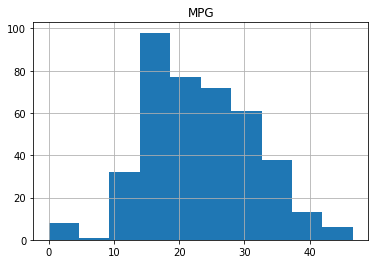

In [6]:
#histogram of MPG
cars.hist(column = 'MPG')
plt.show()

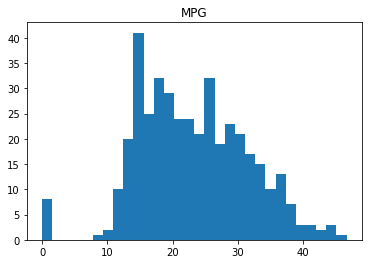

In [8]:
#Additional arguments: 
cars.hist(column = 'MPG',
          grid = False,             # doesnt inclde grid, by default true
          figsize = (6, 4),         # (length, height) of plot in inches
          bins = 30)                # number of bins
plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html*

In [ ]:
#Labelling the axes and giving the title



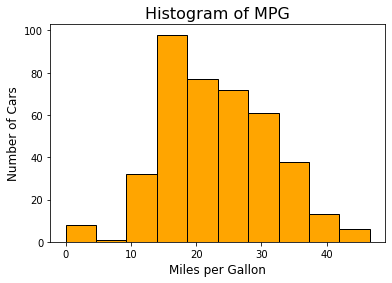

In [9]:
#Editing color and edgecolor
cars.hist(column = 'MPG',
          grid = False,             # doesnt inclde grid, by default true
          figsize = (6, 4),         # (length, height) of plot in inches
          bins = 10,
          color = 'orange',         # color of histogram
          edgecolor = 'black')      # color of edges

plt.xlabel("Miles per Gallon", fontsize = 12)   # label of x axis and its font
plt.ylabel("Number of Cars", fontsize = 12)
plt.title("Histogram of MPG", fontsize = 16)    # label of title and its font

plt.show()


In [ ]:
#Breaking up by the categories of a categorical variable




#### 3B. Boxplots

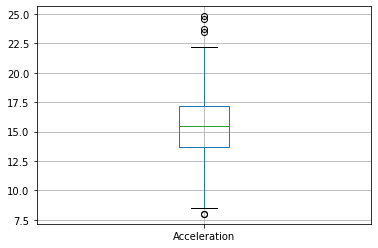

In [10]:
#Plotting a boxplot for the variable MPG
cars.boxplot(column = "Acceleration")
plt.show()

### upper bound in box plot = min(largest value, Q3 + 1.5*IQR)
### lower bound in box plot = max(smallest value, Q1 - 1.5*IQR)

In [ ]:
#Additional arguments (horizontal boxplot)



*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html*

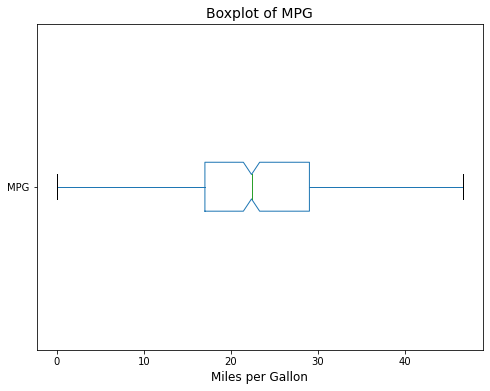

In [13]:
#Labelling the boxplot
cars.boxplot(column = "MPG",
             notch = True,                    # To get the notch
             grid = False,
             figsize = (8, 6),
             vert = False)                    # To plot horizontal boxplot

plt.xlabel("Miles per Gallon", fontsize = 12)
plt.title("Boxplot of MPG", fontsize = 14)

plt.show()


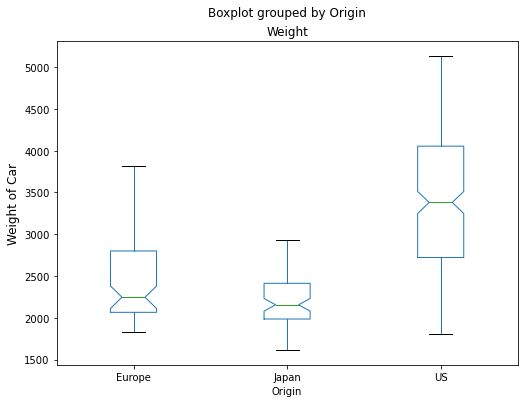

In [14]:
#Side by Side boxplot

cars.boxplot(column = "Weight",
             notch = True,                    # To get the notch
             by = "Origin",
             grid = False,
             figsize = (8, 6))                    
plt.ylabel("Weight of Car", fontsize = 12)
plt.show()

In [ ]:
#The rotation argument
#Side by Side boxplot



#### 3C. Bar Plots

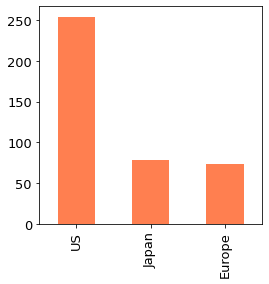

In [19]:
cars['Origin'].value_counts().plot(kind = 'bar', figsize = (4, 4), color = 'coral', fontsize = 13)
plt.show()

<AxesSubplot:ylabel='Frequency'>

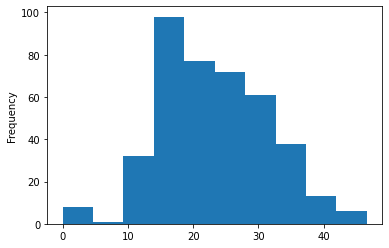

In [20]:
cars.MPG.plot(kind = 'hist')

<AxesSubplot:>

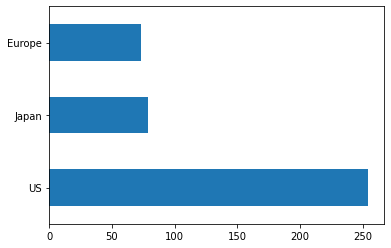

In [21]:
cars['Origin'].value_counts().plot(kind = 'barh')

Study pandas.DataFrame.plot: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 

#### 3D. Scatter Plots

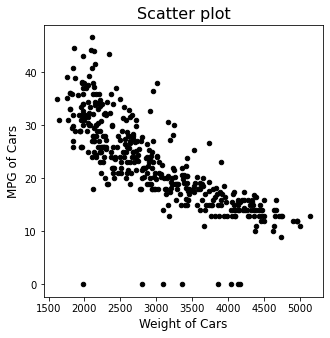

In [23]:
#Scatter plot 
cars.plot(kind = 'scatter',
          x = "Weight",
          y = "MPG",
          color = "black",
          figsize = (5, 5))

plt.xlabel("Weight of Cars", fontsize = 12)   # label of x axis and its font
plt.ylabel("MPG of Cars", fontsize = 12)
plt.title("Scatter plot", fontsize = 16)    # label of title and its font

plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html*

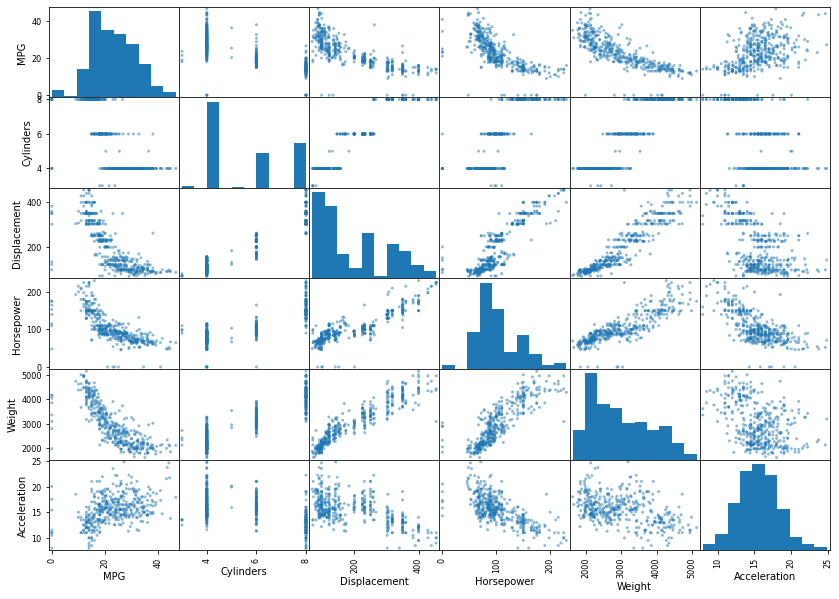

In [24]:
#Pairwise Scatterplot
from pandas.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car", "Model", "Origin"], axis = 1), alpha = 0.5,
               figsize = (14, 10), diagonal = 'hist')
plt.show()

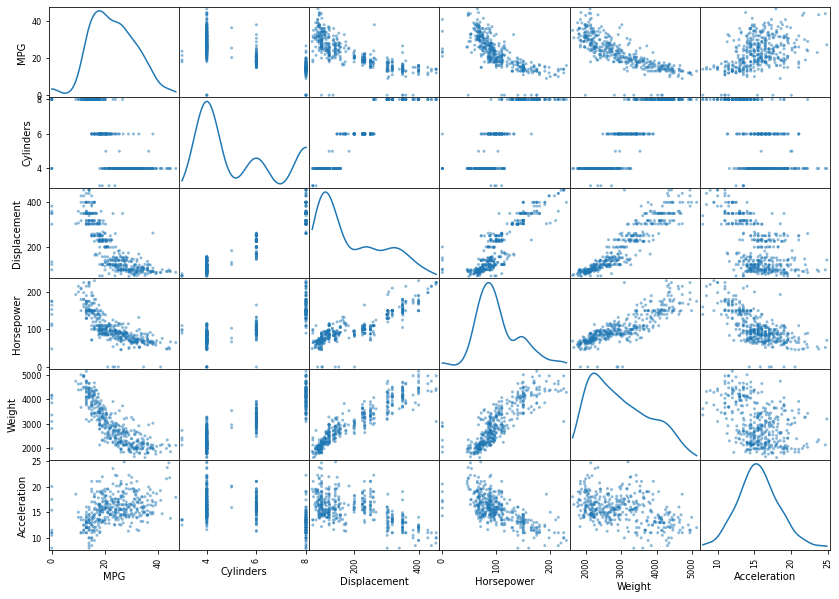

In [26]:
scatter_matrix(cars.drop(["Car", "Model", "Origin"], axis = 1), alpha = 0.5,
               figsize = (14, 10), diagonal = 'kde')
plt.show()

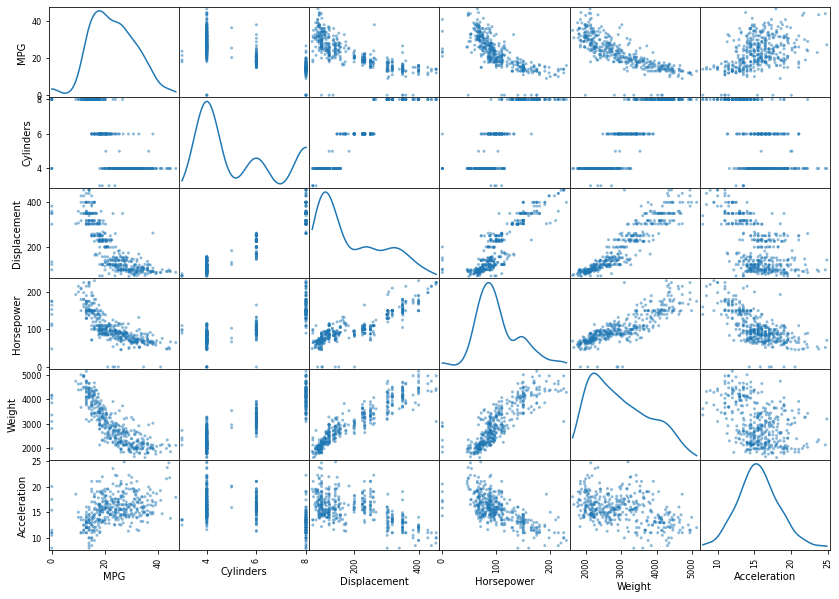

In [28]:
#Exporting Graph

scatter_matrix(cars.drop(["Car", "Model", "Origin"], axis = 1), alpha = 0.5,
               figsize = (14, 10), diagonal = 'kde')
plt.savefig('scatter.png')

## Part 2 - Data Manipulation

#### 1. Sorting

In [29]:
#Sort the data in ascending order of MPG
cars.sort_values("MPG").head(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
367,Saab 900s,0.0,4,121.0,110,2800,15.4,81,Europe
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
39,Volkswagen Super Beetle 117,0.0,4,97.0,48,1978,20.0,71,Europe
10,Citroen DS-21 Pallas,0.0,4,133.0,115,3090,17.5,70,Europe
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
34,Hi 1200D,9.0,8,304.0,193,4732,18.5,70,US
31,Ford F250,10.0,8,360.0,215,4615,14.0,70,US


In [30]:
cars.sort_values("MPG").tail(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
254,Datsun B210 GX,39.4,4,85.0,70,2070,18.6,78,Japan
331,Datsun 210,40.8,4,85.0,65,2110,19.2,80,Japan
337,Renault Lecar Deluxe,40.9,4,85.0,0,1835,17.3,80,Europe
316,Volkswagen Rabbit,41.5,4,98.0,76,2144,14.7,80,Europe
251,Volkswagen Rabbit Custom Diesel,43.1,4,90.0,48,1985,21.5,78,Europe
333,Volkswagen Dasher (diesel),43.4,4,90.0,48,2335,23.7,80,Europe
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
332,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48,2085,21.7,80,Europe
336,Honda Civic 1500 gl,44.6,4,91.0,67,1850,13.8,80,Japan
329,Mazda GLC,46.6,4,86.0,65,2110,17.9,80,Japan


In [32]:
#Sort the data in descending order of MPG
cars.sort_values("MPG", ascending = 0).head(5)           # by default sorting is ascending, here it is set '0' so descending

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
329,Mazda GLC,46.6,4,86.0,65,2110,17.9,80,Japan
336,Honda Civic 1500 gl,44.6,4,91.0,67,1850,13.8,80,Japan
332,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48,2085,21.7,80,Europe
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
333,Volkswagen Dasher (diesel),43.4,4,90.0,48,2335,23.7,80,Europe


In [33]:
#Sort the data in descending order of Origin and then by increasing order of MPG
cars.sort_values(["Origin", "MPG"], ascending=[0, 1])[["Origin", "MPG"]]

,Origin,MPG
11,US,0.0
12,US,0.0
13,US,0.0
14,US,0.0
17,US,0.0
...,...,...
316,Europe,41.5
251,Europe,43.1
333,Europe,43.4
402,Europe,44.0


In [34]:
cars.sort_values(["Origin", "MPG"], ascending=[0, 1])

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
...,...,...,...,...,...,...,...,...,...
316,Volkswagen Rabbit,41.5,4,98.0,76,2144,14.7,80,Europe
251,Volkswagen Rabbit Custom Diesel,43.1,4,90.0,48,1985,21.5,78,Europe
333,Volkswagen Dasher (diesel),43.4,4,90.0,48,2335,23.7,80,Europe
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe


In [35]:
#Saving in another data frame
cars2 = cars.sort_values(["Origin", "MPG"], ascending=[0, 1])

In [36]:
# Exporting data into csv file
cars2.to_csv("Sorted cars data.csv")

#### 2. Variable Transformation

In [37]:
import numpy as np

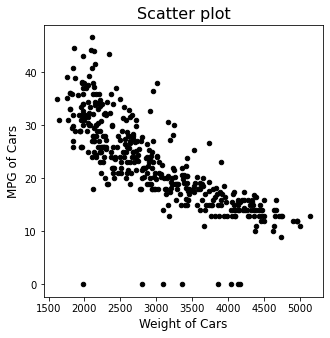

In [39]:
# Plot a scatter plot between MPG and weight. Comment of the linearity.
cars.plot(kind = 'scatter',
          x = "Weight",
          y = "MPG",
          color = "black",
          figsize = (5, 5))

plt.xlabel("Weight of Cars", fontsize = 12)   # label of x axis and its font
plt.ylabel("MPG of Cars", fontsize = 12)
plt.title("Scatter plot", fontsize = 16)    # label of title and its font

plt.show()

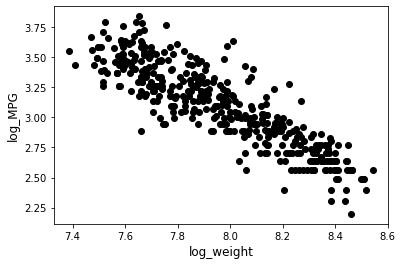

In [40]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve?
plt.scatter(np.log(cars.Weight), y = np.log(cars.MPG), color = "black")
plt.xlabel("log_weight", fontsize = 12)   # label of x axis and its font
plt.ylabel("log_MPG", fontsize = 12)
plt.show()

In [42]:
cars.MPG.describe()

count    406.000000
mean      23.051232
std        8.401777
min        0.000000
25%       17.000000
50%       22.350000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

In [41]:
# But there is a problem! Check the summary of log(MPG). What do you observe?
np.log(cars.MPG).describe()

count    406.000000
mean           -inf
std             NaN
min            -inf
25%        2.833213
50%        3.106824
75%        3.367296
max        3.841601
Name: MPG, dtype: float64

In [43]:
# Can you identify where we got misleaded? Probably the answer lies in the summary of MPG.
# How can we correct this?
np.log(cars.MPG + 1).describe()

count    406.000000
mean       3.085804
std        0.543030
min        0.000000
25%        2.890372
50%        3.150595
75%        3.401197
max        3.862833
Name: MPG, dtype: float64